In [5]:
#sklearn 에서 아이리스 데이터 로드
from sklearn import datasets
iris = datasets.load_iris()
samples = iris.data
print(samples)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

<function matplotlib.pyplot.show(close=None, block=None)>

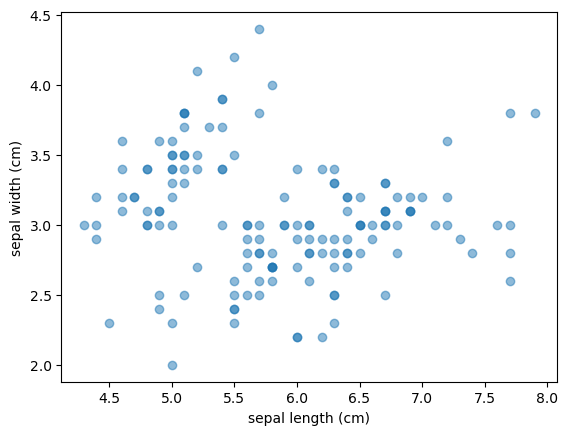

In [9]:
#sepal length, width 를 사용해서 산전도를 그림
from matplotlib import pyplot as plt
x = samples[:,  0]
y = samples[:, 1]
plt.scatter(x, y, alpha=0.5)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show

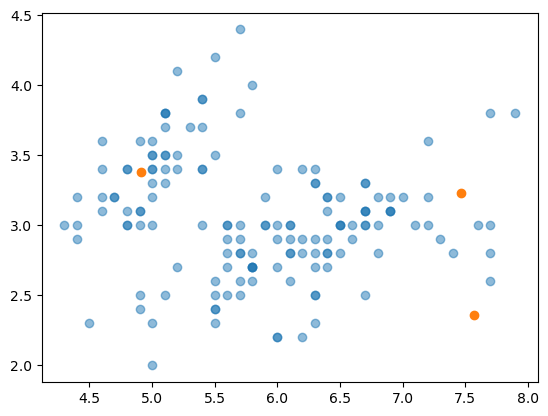

In [11]:
# place k random centroids
import numpy as np
k = 3

centroids_x = np.random.uniform(min(x), max(x), k)
centroids_y = np.random.uniform(min(y), max(y), k)
centroids = list(zip(centroids_x, centroids_y))

plt.scatter(x, y, alpha=0.5)
plt.scatter(centroids_x, centroids_y)
plt.show()

$distance = \sqrt((a_1 - b_1)^2 + (a_2 - b_2)^2 + ... + (a_n - b_n)^2)$

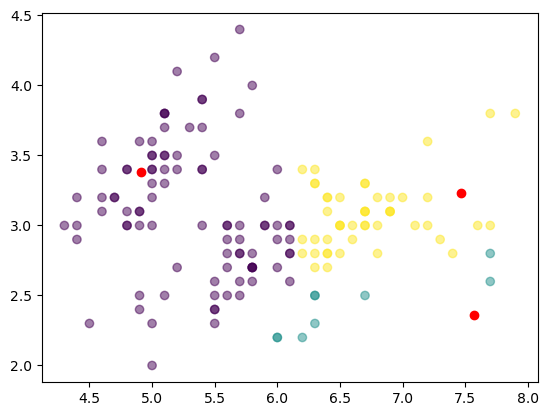

In [17]:
def distance(a, b):
    return sum([(el_a - el_b) **2 for el_a, el_b in list(zip(a, b))]) ** 0.5

labels = np.zeros(len(samples))
sepal_length_width = np.array(list(zip(x, y)))

for i in range(len(samples)):
    distances = np.zeros(k)
    for j in range(k):
        distances[j] = distance(sepal_length_width[i], centroids[j])
    cluster = np.argmin(distances)
    labels[i] = cluster
plt.scatter(x, y, c=labels, alpha=0.5)
plt.scatter(centroids_x, centroids_y, c='red')
plt.show()

[array([5.31397849, 3.10752688]), array([6.57777778, 2.42222222]), array([6.73125   , 3.07916667])]
<class 'list'>
[(4.908213751181457, 3.379543630827615), (7.572714454680618, 2.3628605652226864), (7.4665116950099915, 3.2342932614528306)]
<class 'list'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


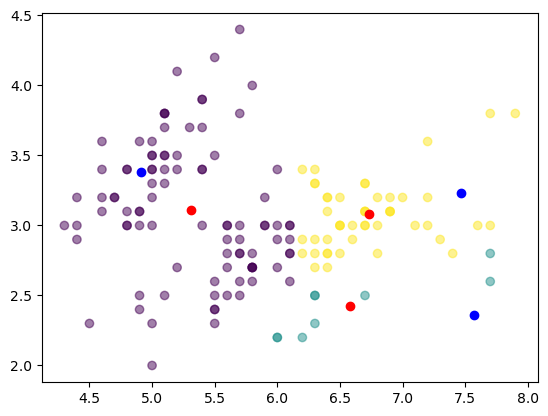

In [19]:
from copy import deepcopy
centroids_old = deepcopy(centroids)

for i in range(k):
    points = [sepal_length_width[j] for j in range(len(sepal_length_width)) if labels[j] == i]
    centroids[i] = np.mean(points, axis=0)

print(centroids)
print(type(centroids))
print(centroids_old)
print(type(centroids_old))

centroids = np.array(centroids)
centroids_old = np.array(centroids_old)
print(type(centroids))
print(type(centroids_old))
plt.scatter(x, y, c=labels, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red')
plt.scatter(centroids_old[:, 0], centroids_old[:, 1], c='blue')
plt.show()

In [21]:
centroids_old = np.zeros(centroids.shape)
labels = np.zeros(len(samples))
error = np.zeros(k)

for i in range(k):
    error[i] = distance(centroids_old[i], centroids[i])

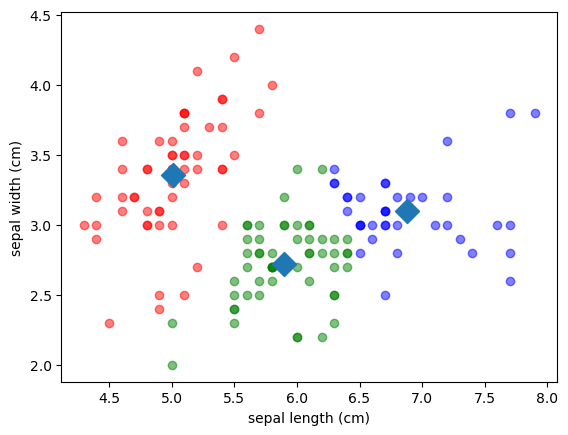

In [27]:
while error.all() != 0:
    for i in  range(len(samples)):
        distances = np.zeros(k)
        for j in range(k):
            distances[j] = distance(sepal_length_width[i], centroids[j])
        cluster = np.argmin(distances)
        labels[i] = cluster
    centroids_old = deepcopy(centroids)
    for i in range(k):
        points = [sepal_length_width[j] for j in range(len(sepal_length_width)) if labels[j] == i]
        centroids[i] = np.mean(points, axis=0)
    for i in range(k):
        error[i] = distance(centroids_old[i], centroids[i])

colors = ['r', 'g', 'b']
for i in range(k):
    points = np.array([sepal_length_width[j] for j in range(len(sepal_length_width)) if labels[j] == i])
    plt.scatter(points[:, 0], points[:, 1], c=colors[i], alpha=0.5)

max_iterations  = 100
tolerance = 1e-4

iteration = 0
while error.all() >tolerance and iteration < max_iterations:
    iteration += 1

    for i in range(len(samples)):
        distances = np.zeros(k)
        for j in range(len(samples)):
            distances = np.zeros(k)
            for j in range(k):
                distances[j] = distance(sepal_length_width[i], centroids[j])
            cluster = np.argmin(distances)
            labels[i] = cluster
    centroids_old = deepcopy(centroids)
    for i in range(k):
        pointer = [sepal_length_width[j] for j in range(len(sepal_length_width)) if labels[j] == i]
        if points:
            centroids[i] = np.mean(points, axis=0)

    for i in range(k):
        error[i] = distance(centroids_old[i], centroids[i])



plt.scatter(centroids[:, 0], centroids[:, 1], marker='D', s=150)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()